In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import scanpy as sc
import tabulate
from importlib import reload

# locals
import utils as ut
reload(ut)

<module 'utils' from '/home/cstansbu/git_repositories/spatial_transcriptomics/clustering/utils.py'>

In [2]:
sc.settings.verbosity = 3 
sc.settings.set_figure_params(dpi=300, facecolor='white')

In [3]:
dirPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/scRNAseq/"

adata = {}

for f in os.listdir(dirPath):
    
    if not f == "all":
        cond = f
        mtxPath = f"{dirPath}{f}"
        data = sc.read_10x_mtx(mtxPath, cache=True)
        data.var_names = [x.upper() for x in data.var_names] # uppercase gene names
        adata[cond] = data
    
print("done")

... reading from cache file cache/nfs-turbo-umms-indikar-shared-projects-spatial_transcriptomics-data-scRNAseq-HFD14-matrix.h5ad
... reading from cache file cache/nfs-turbo-umms-indikar-shared-projects-spatial_transcriptomics-data-scRNAseq-ND-matrix.h5ad
... reading from cache file cache/nfs-turbo-umms-indikar-shared-projects-spatial_transcriptomics-data-scRNAseq-HFD8-matrix.h5ad
done


normalizing counts per cell
    finished (0:00:00)


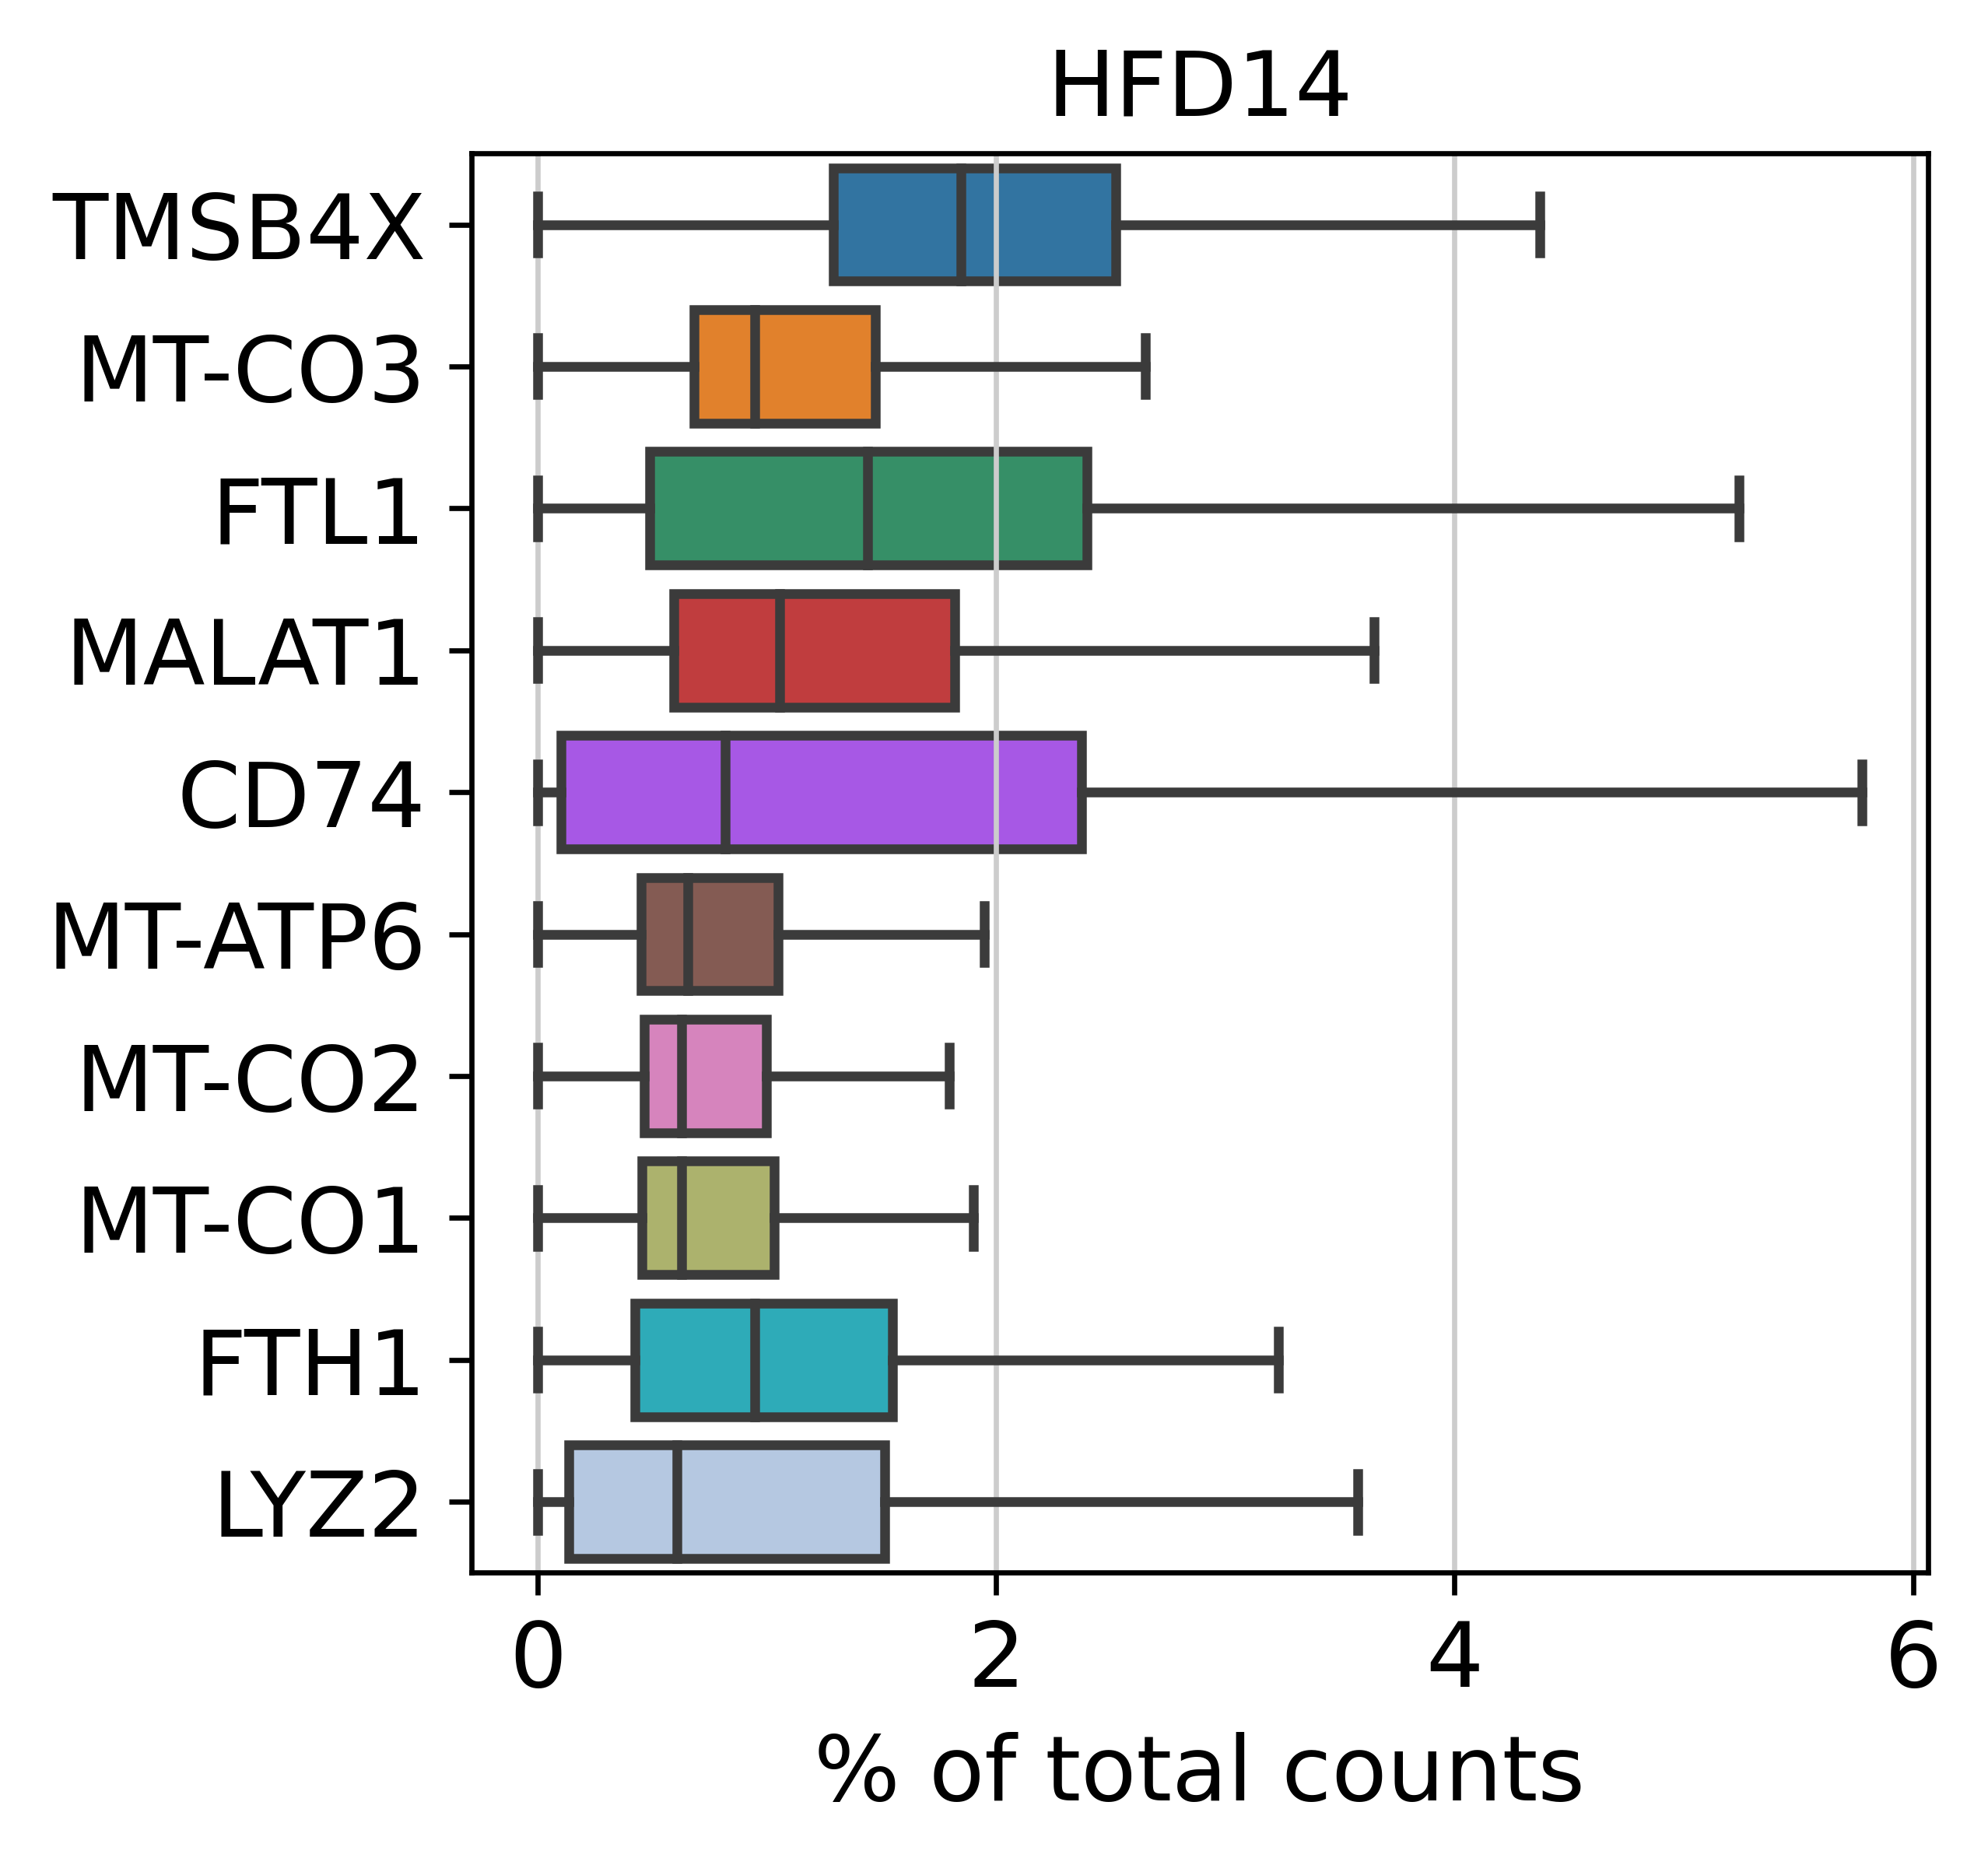

normalizing counts per cell
    finished (0:00:00)


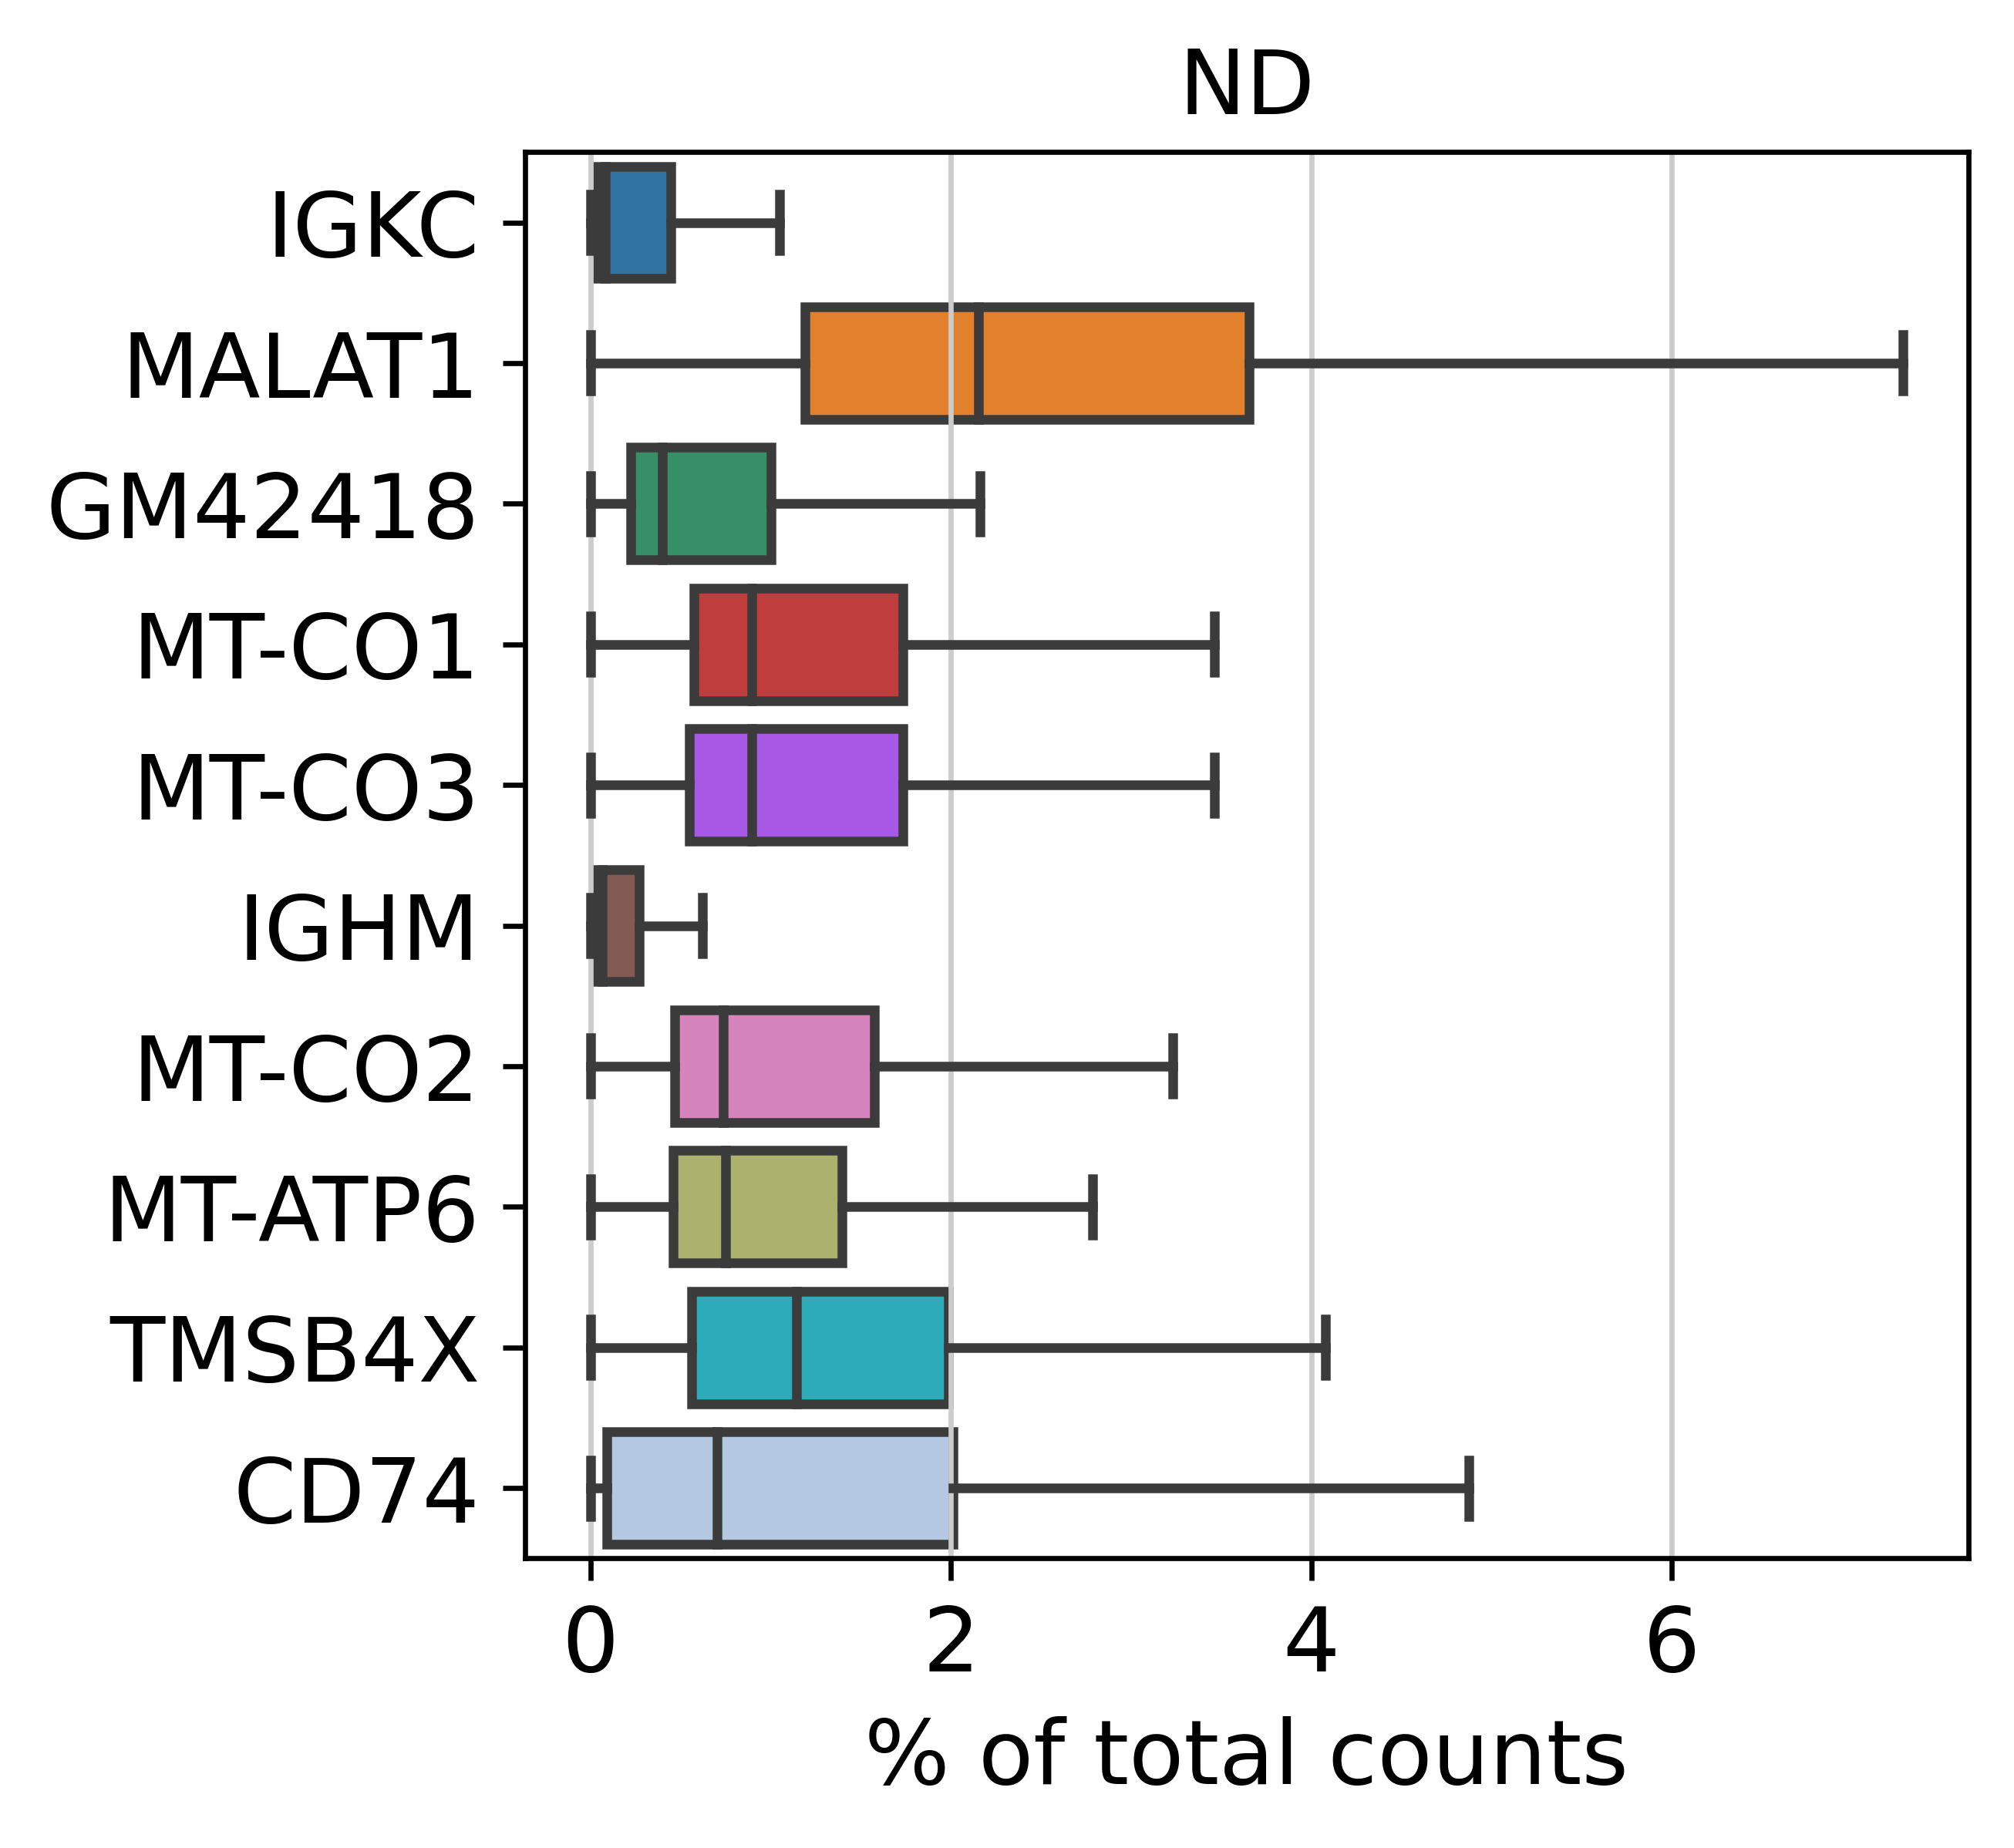

normalizing counts per cell
    finished (0:00:00)


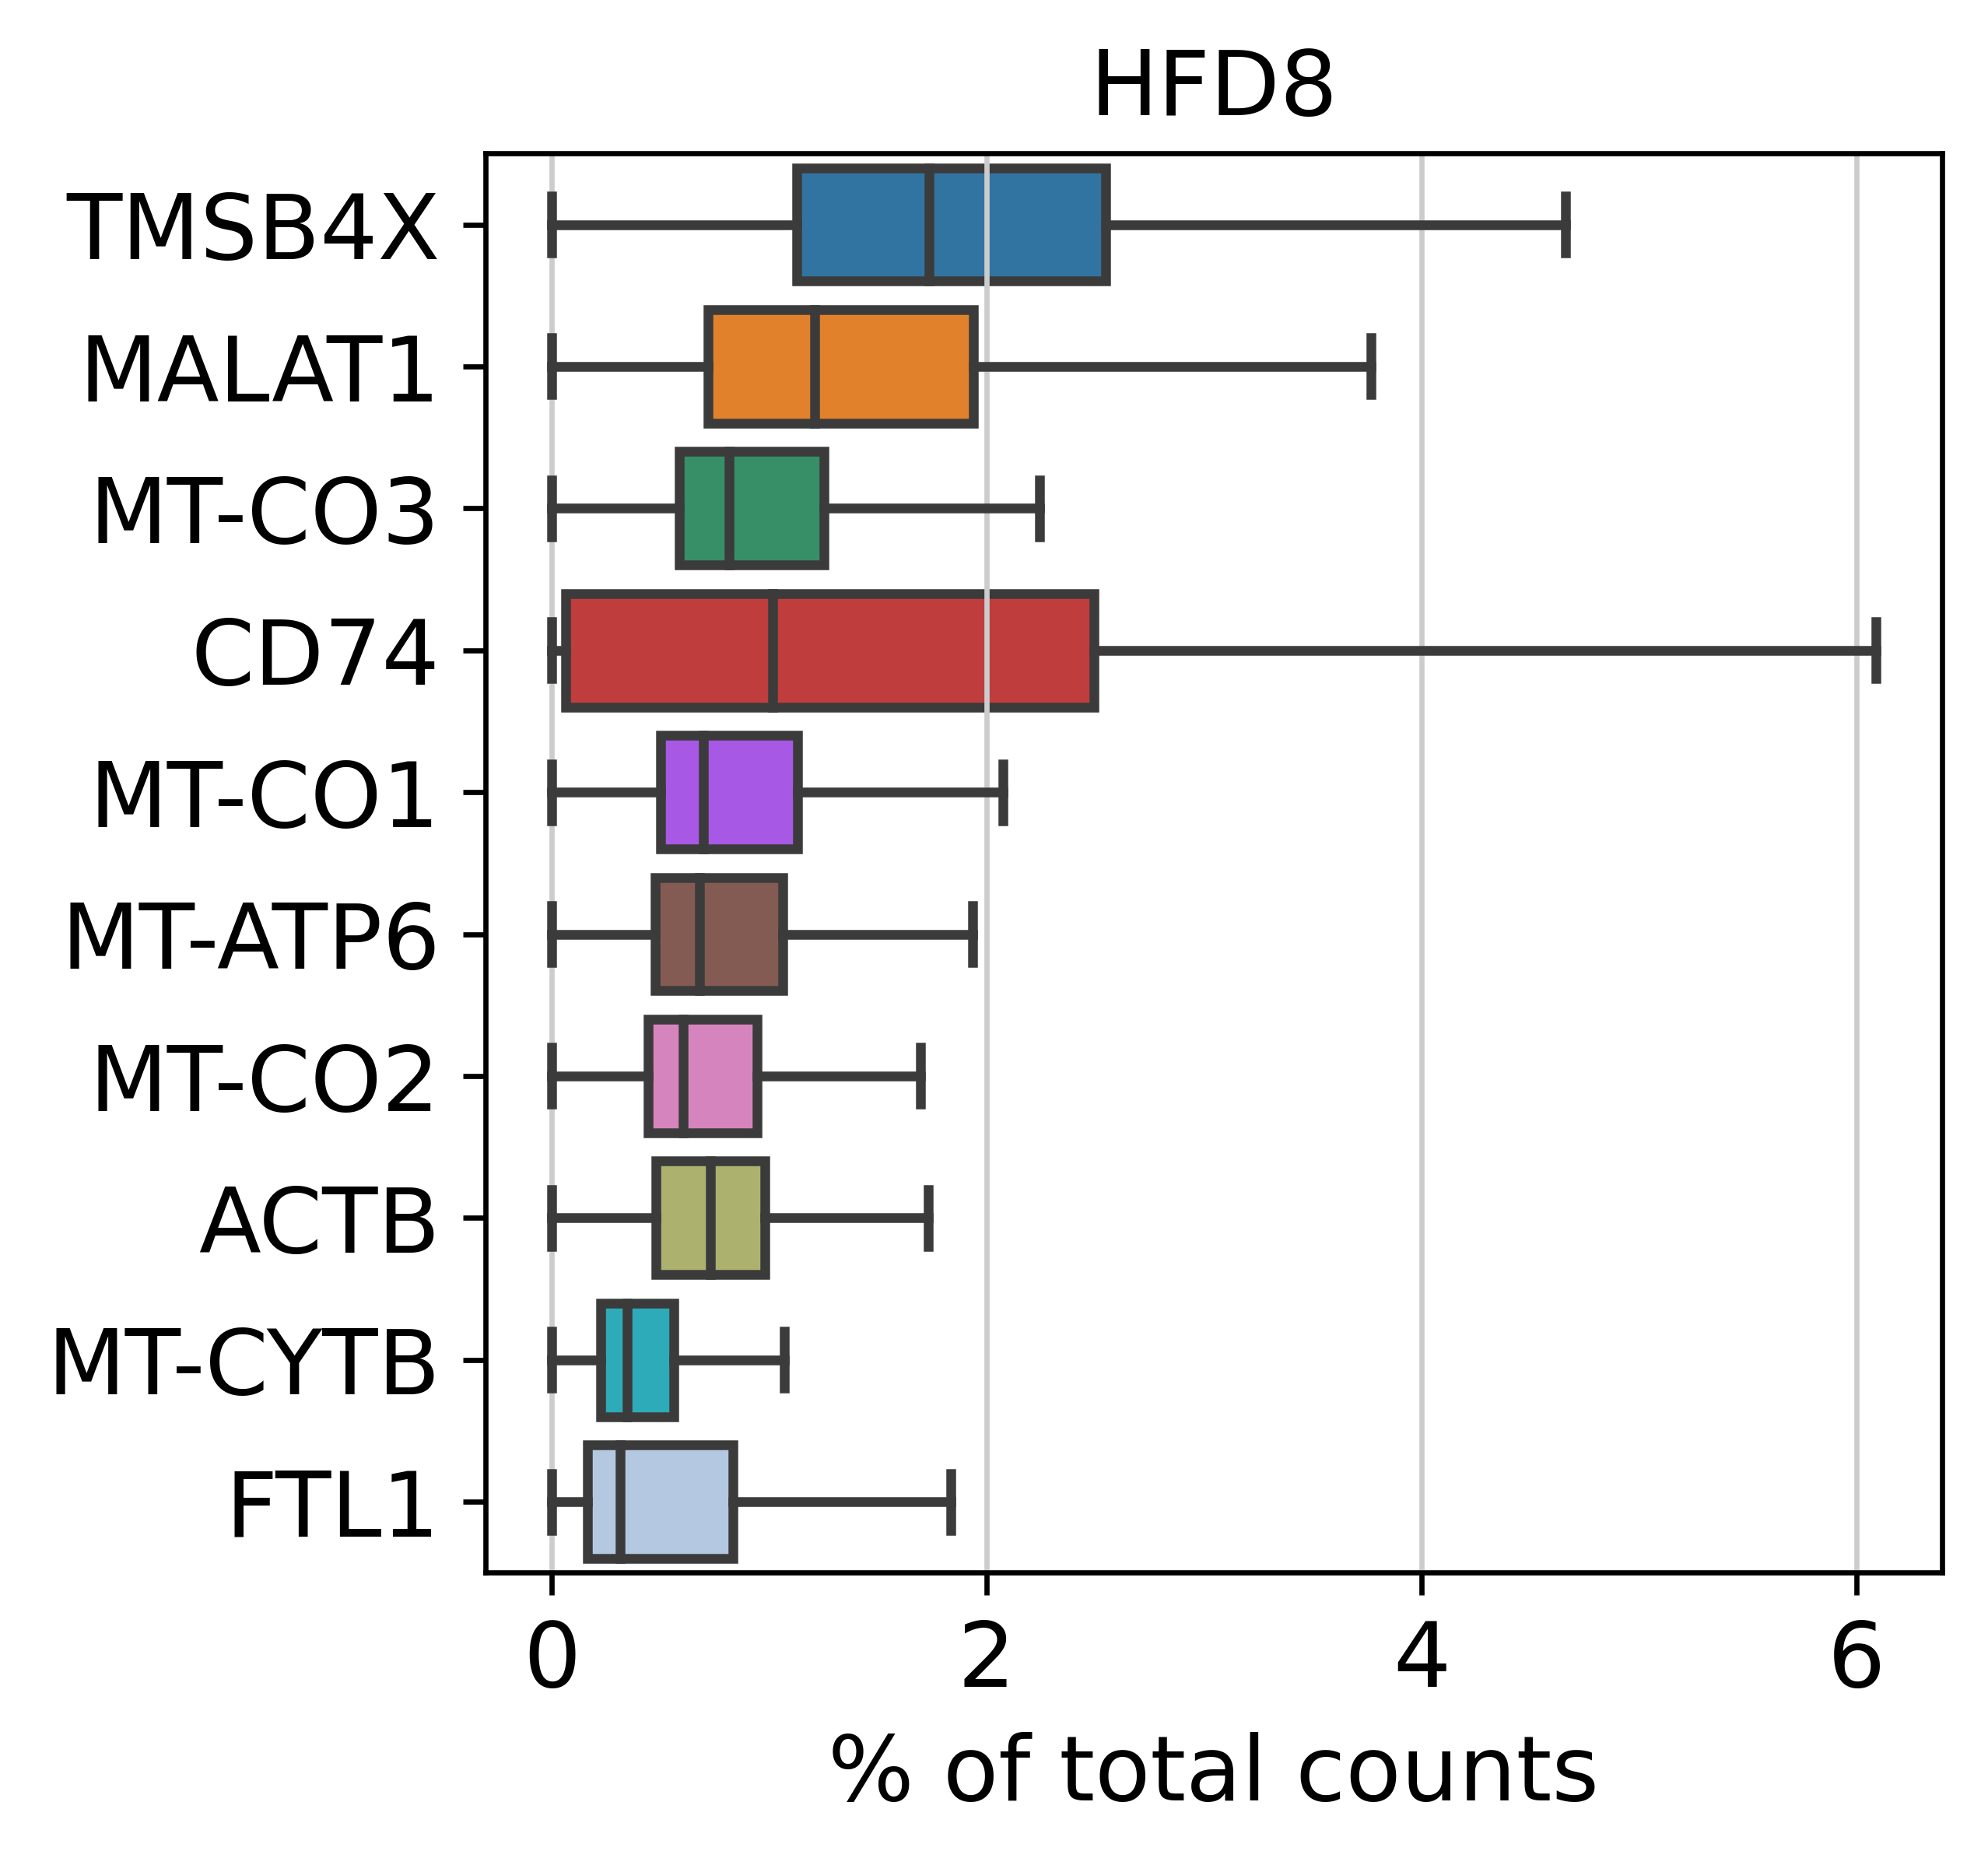

In [4]:
# plot the top genes per time
plt.rcParams['figure.dpi'] = 300
    
for d, data in adata.items():
    fig, axes = plt.subplots(1,1)
    axes.set_title(d)
    sc.pl.highest_expr_genes(data, 
                             n_top=10, 
                             showfliers=False,
                             ax=axes)

In [5]:
min_genes = 500
min_cells = 1

for d, data in adata.items():
    print(d)
    sc.pp.filter_cells(data, min_genes=min_genes)
    sc.pp.filter_genes(data, min_cells=min_cells)
    sc.pp.normalize_total(data, target_sum=1e4) # Normalize each cell by total counts over all genes
    sc.pp.log1p(data) # Logarithmize data via `X = \log(X + 1)`,
    sc.pp.scale(data) # unit variance and zero mean

HFD14
filtered out 710 cells that have less than 500 genes expressed
filtered out 13601 genes that are detected in less than 1 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
ND
filtered out 153 cells that have less than 500 genes expressed
filtered out 14003 genes that are detected in less than 1 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
HFD8
filtered out 435 cells that have less than 500 genes expressed
filtered out 12902 genes that are detected in less than 1 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [6]:
# # find highly variable genes
# for d, data in adata.items():
#     print(d)
#     sc.pp.highly_variable_genes(data,
#                                 min_mean=0.0125,
#                                 max_mean=3,
#                                 min_disp=0.5)
    
#     sc.pl.highly_variable_genes(data)


In [7]:
# load gene lists 
pandPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/panglaodb/pandb.tsv.gz"        
pandf = ut.read_panglaodb(pandPath)

controlList = [
    # 'Adipocyte progenitor cells', 
    'Adipocytes',
    'B cells', 
    # 'B cells memory', 
    # 'B cells naive',
    'Dendritic cells',
    # 'Gamma delta T cells',
    'Macrophages',
    'Monocytes', 
    # 'Natural killer T cells',
    'NK cells',
    'T cells', 
    # 'T cells naive', 
    # 'T cytotoxic cells',
    # 'T follicular helper cells', 
    # 'T helper cells', 
    # 'T memory cells',
    # 'T regulatory cells',   
]

pandf = pandf[pandf['cell type'].isin(controlList)]
pandf.head()

,species,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse,gene
75,Mm Hs,SLC36A2,Adipocytes,PAT2|tramdorin|TRAMD1,0.003,solute carrier family 36 member 2,protein-coding gene,1.0,Mesoderm,Connective tissue,0.0,0.0,0.000000,0.000000,SLC36A2
76,Mm Hs,P2RX5,Adipocytes,P2X5,0.000,purinergic receptor P2X 5,protein-coding gene,1.0,Mesoderm,Connective tissue,0.0,0.0,0.001884,0.000000,P2RX5
77,Mm Hs,LEP,Adipocytes,OBS,0.000,leptin,protein-coding gene,1.0,Mesoderm,Connective tissue,0.0,0.0,0.000000,0.000000,LEP
78,Mm Hs,UCP1,Adipocytes,SLC25A7|UCP,0.000,uncoupling protein 1,protein-coding gene,1.0,Mesoderm,Connective tissue,0.0,0.0,0.000000,0.000000,UCP1
79,Mm Hs,CIDEA,Adipocytes,CIDE-A,0.004,cell death-inducing DFFA-like effector a,protein-coding gene,1.0,Mesoderm,Connective tissue,0.0,0.5,0.000000,0.004686,CIDEA


In [8]:
# ?sc.pp.neighbors
# ?sc.tl.leiden

computing PCA
    with n_comps=50
    finished (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
computing PCA
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weight

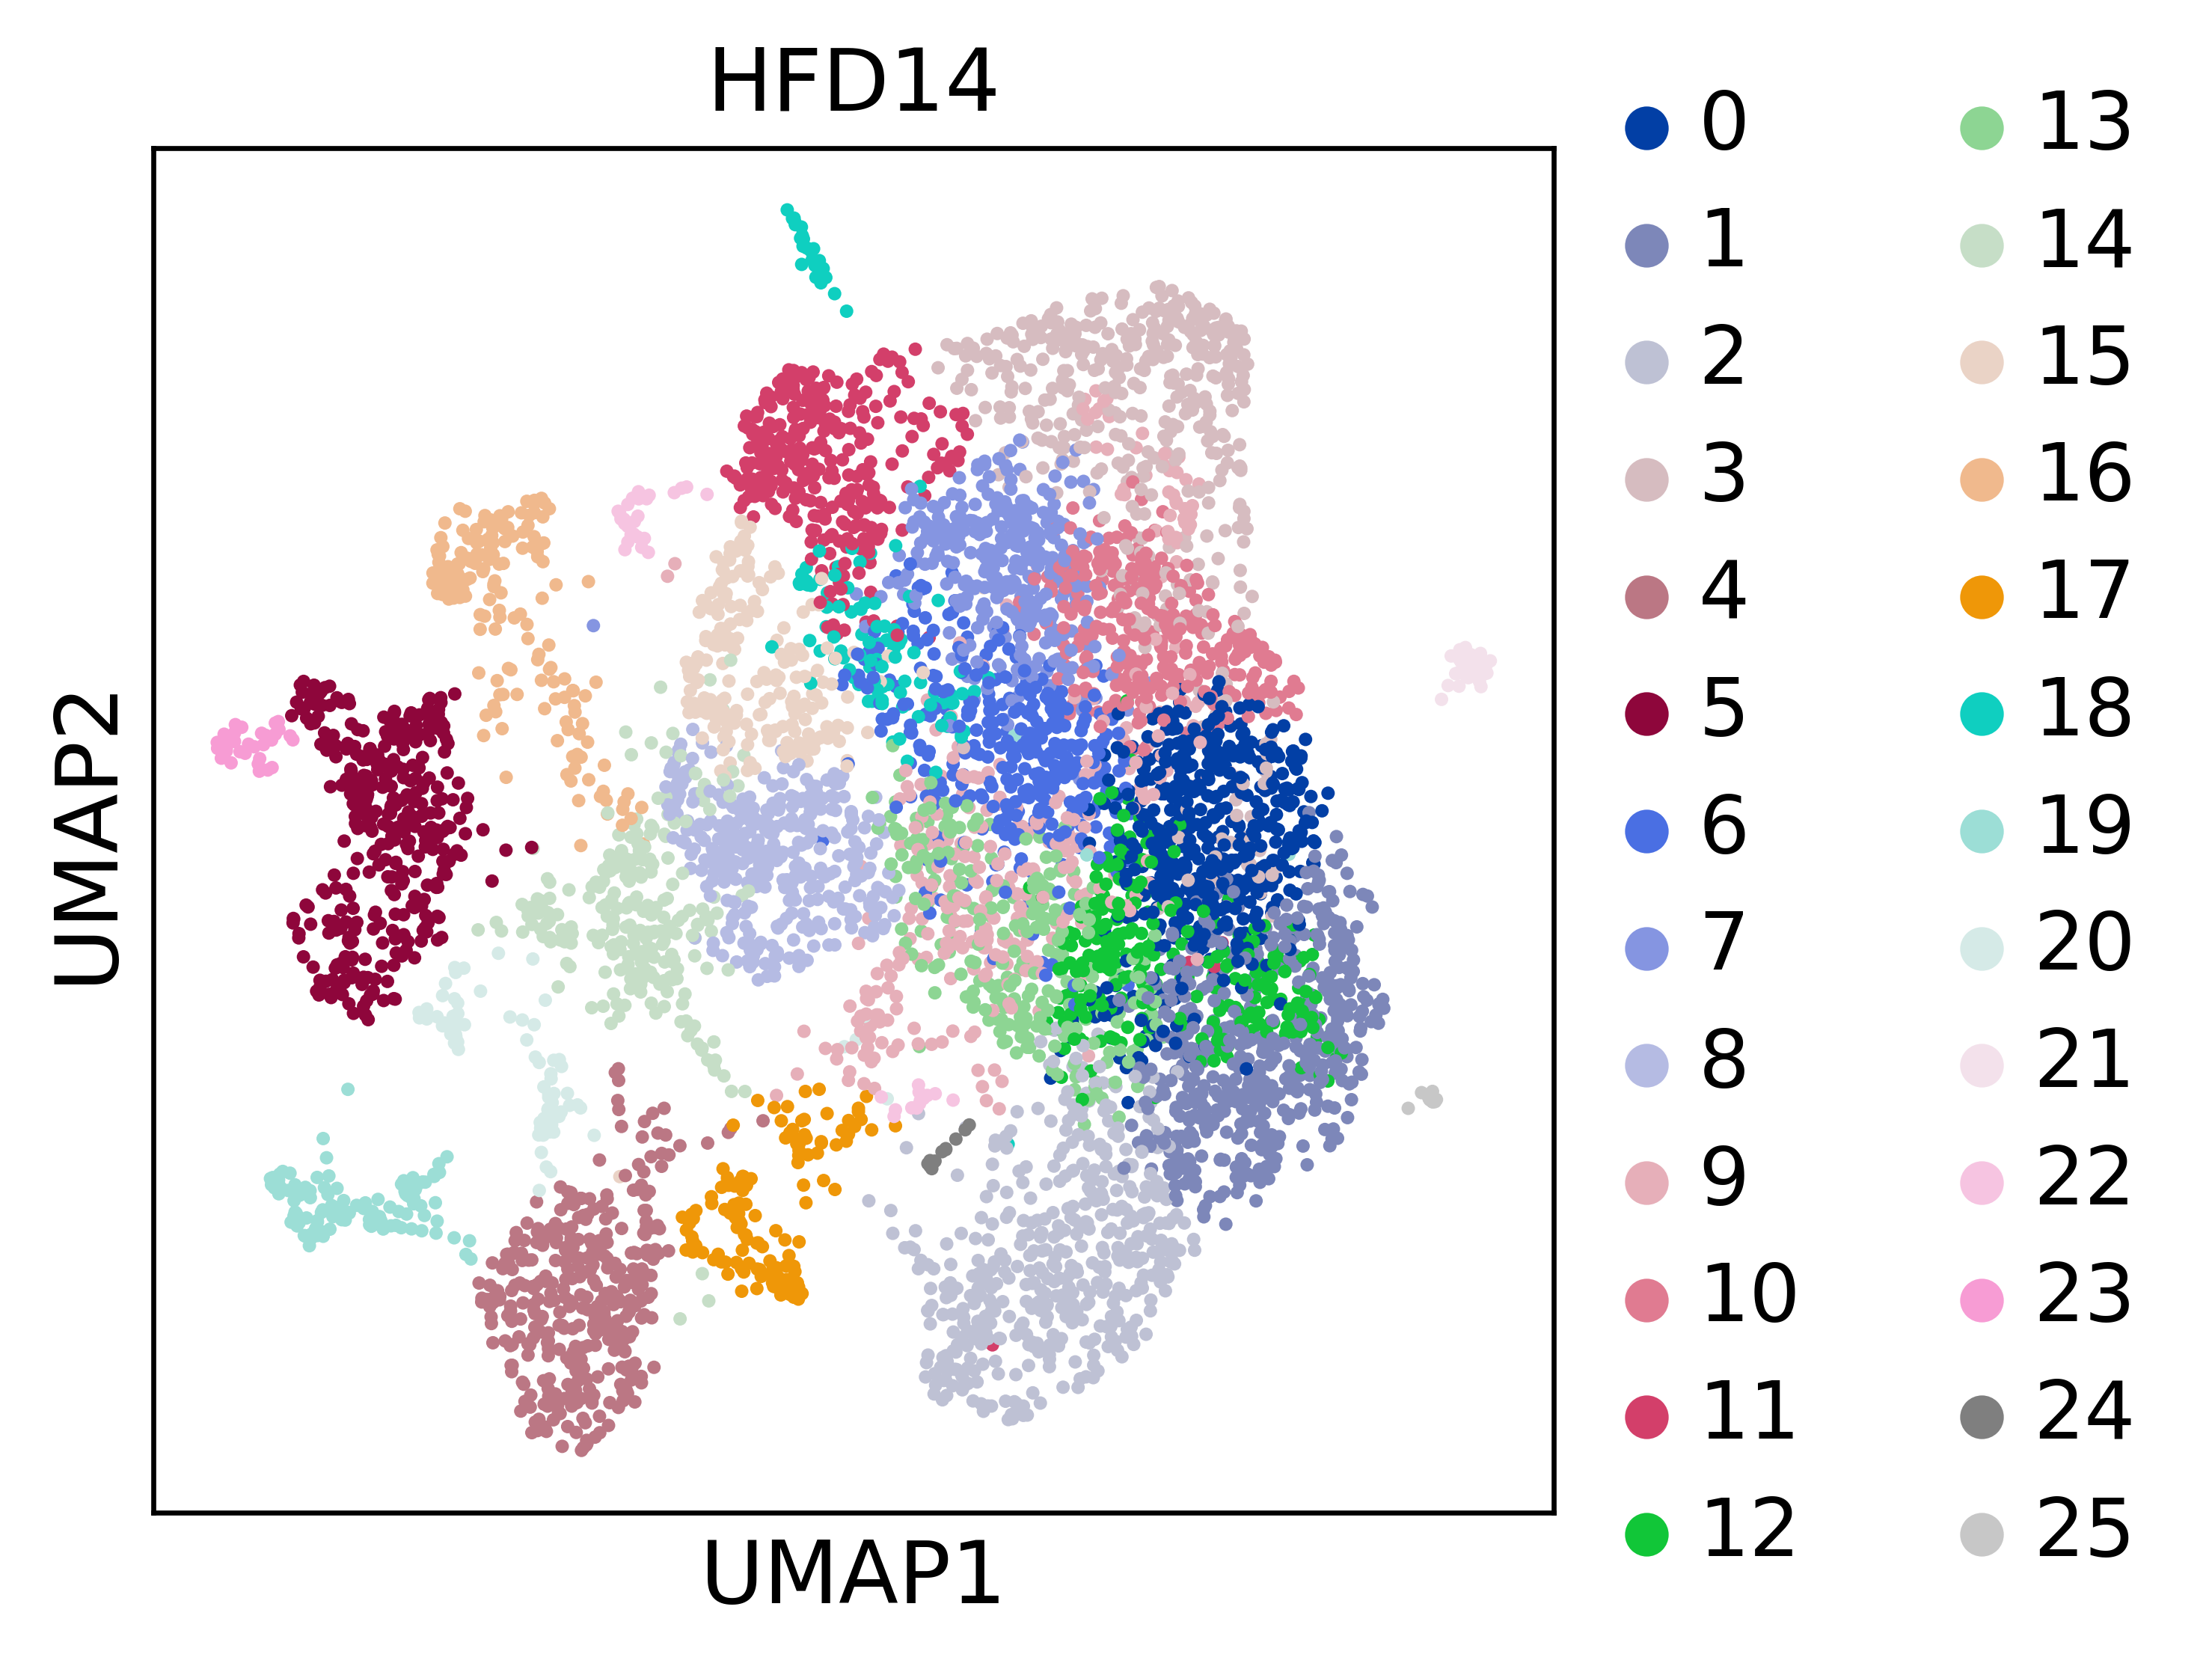

running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


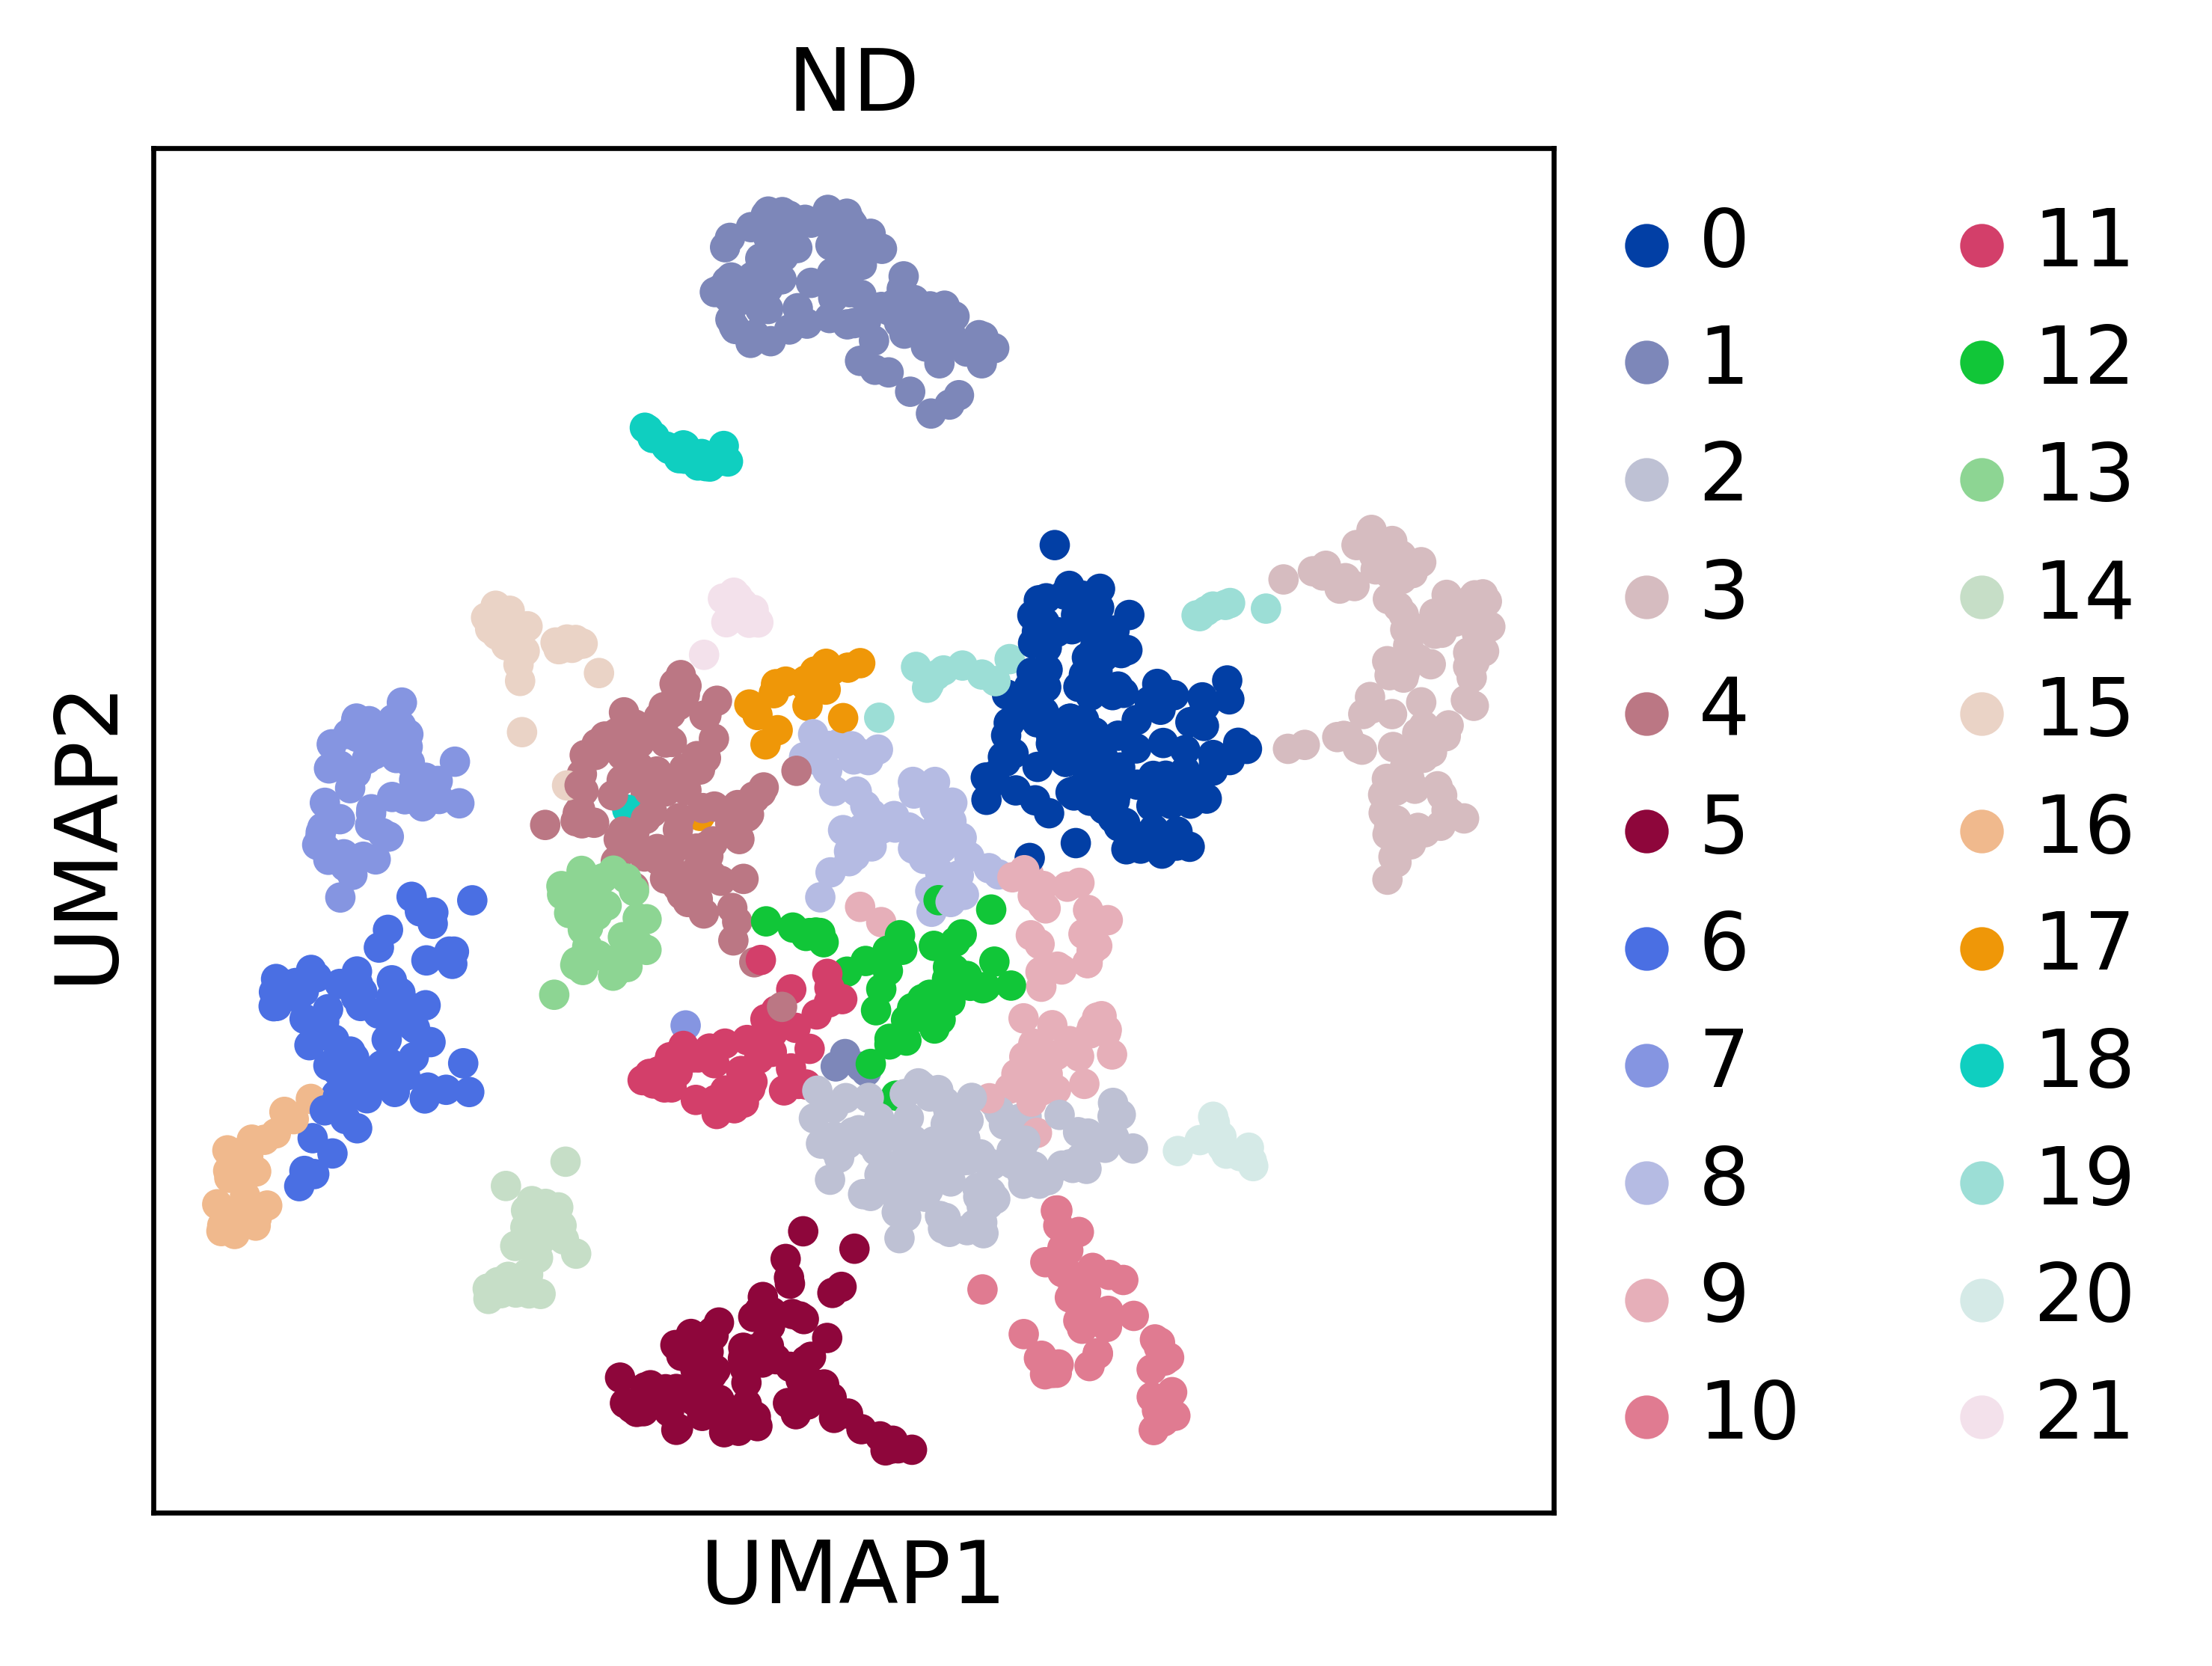

running Leiden clustering
    finished: found 29 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


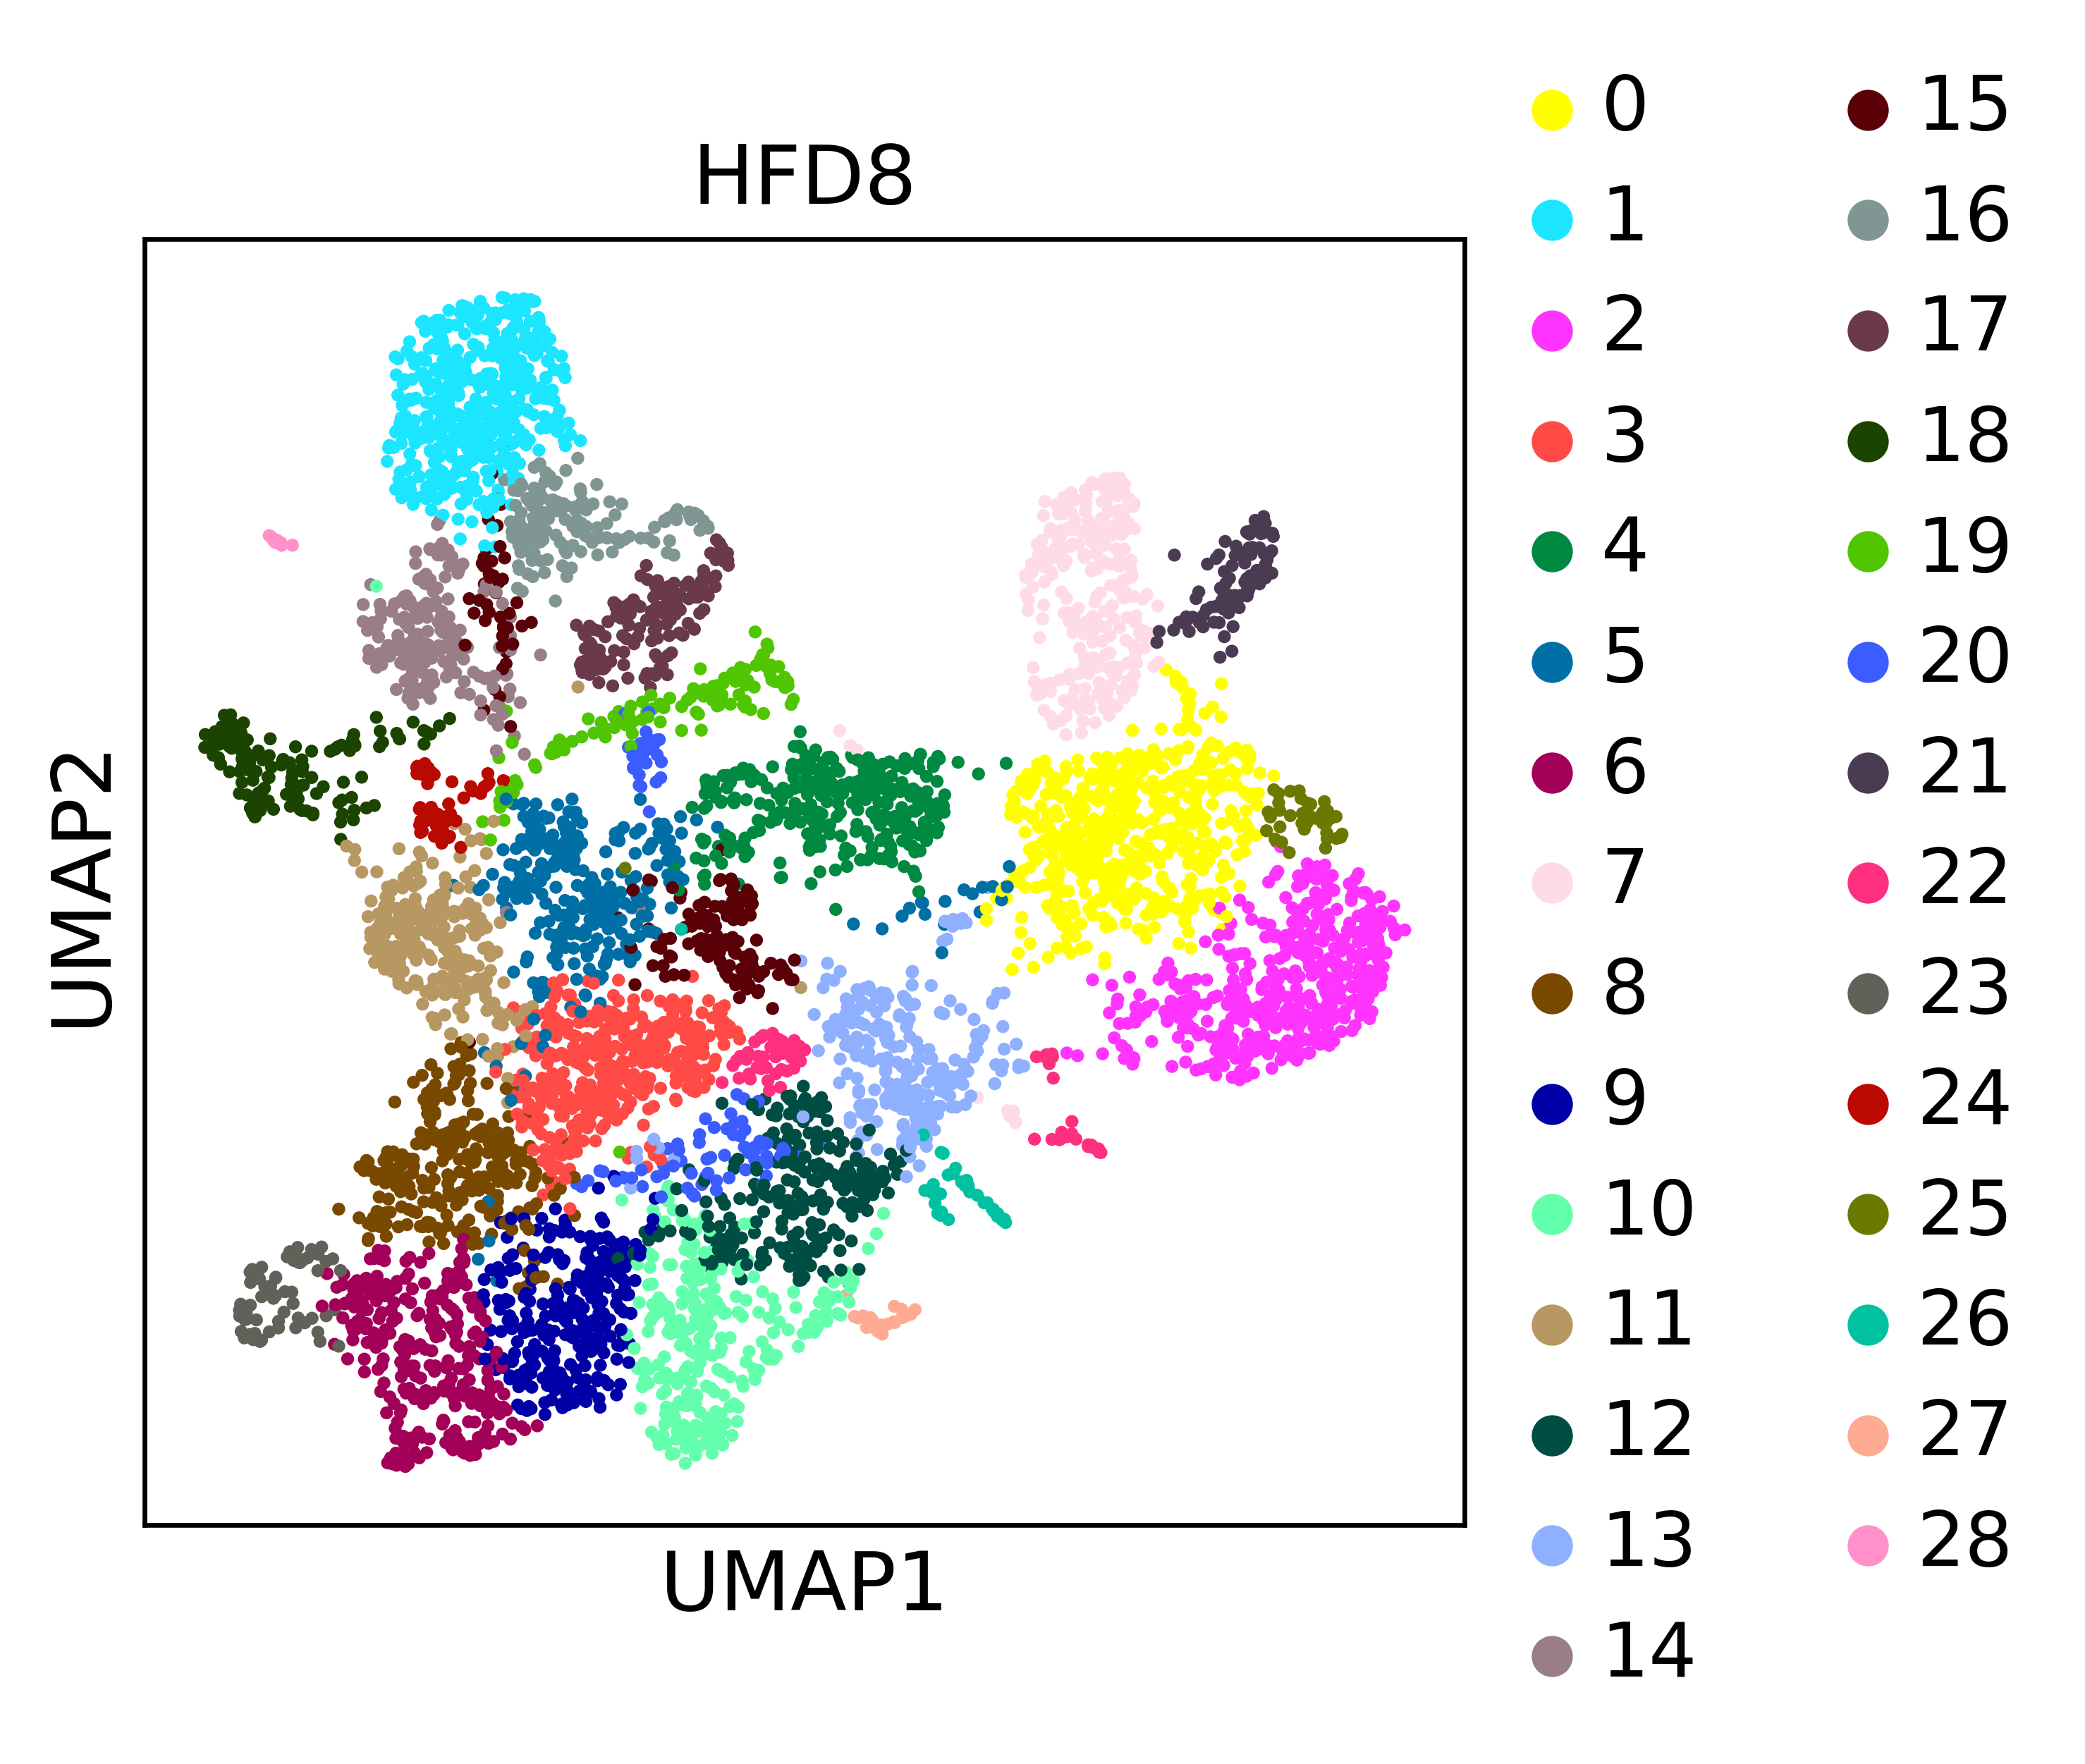

In [10]:
plt.rcParams['figure.dpi'] = 300

n_neighbors = 7
n_pcs = 1000

for d, data in adata.items():
    sc.tl.pca(data, n_comps=n_pcs, svd_solver='arpack')
    sc.pp.neighbors(data, n_neighbors=n_neighbors)
    sc.tl.umap(data)
    
print('done.')

# clustering
for d, data in adata.items():
    sc.tl.leiden(data)
    ax = sc.pl.umap(data, color='leiden', show=False)
    ax.set_title(d)
    
    plt.show()
    

In [ ]:
# break

In [ ]:
geneLists = {}

for d, data in adata.items():    
    dfList = []
    
    sc.tl.rank_genes_groups(data, 'leiden', method='t-test')
    
    result = data.uns['rank_genes_groups']
    keys = data.uns['rank_genes_groups'].keys()
    groups = result['names'].dtype.names

    for group in groups:
        t = pd.DataFrame(result['names'][group])
        t.columns = ['gene']
        t['scores'] = result['scores'][group]
        t['pvals'] = result['pvals'][group]
        t['pvals_adj'] = result['pvals_adj'][group]
        t['logfoldchanges'] = result['logfoldchanges'][group]
        t['cluster'] = group
        dfList.append(t)
        
    gf = pd.concat(dfList, ignore_index=True)
    gf['data'] = d
    geneLists[d] = gf

print('done')

In [ ]:
sortby = 'scores'

for d, df in geneLists.items():
    print("\n", d)
    print("----------------------------------------")
    dfList = []
    
    for i in df['cluster'].unique():
        clusterGenes = df[df['cluster'] == i].reset_index(drop=True)
        clusterGenes = clusterGenes.sort_values(by=sortby, ascending=False)
        clusterGenes['gene'] = clusterGenes['gene'].str.upper()
        
        scores = ut.getScores(i, clusterGenes, pandf, controlList, sortby)
        dfList.append(scores)

    h = pd.concat(dfList, axis=1, ignore_index=False)
    for c in h.columns:
        maxScore = h[h[c] == h[c].max()].index.values[0]
        print(c, maxScore)


In [ ]:
break

In [ ]:
# for d, data in adata.items():
#     dfList = []
#     result = data.uns['rank_genes_groups']
#     groups = result['names'].dtype.names
    
#     for grp in groups:
#         print(result.keys())
#         print(result['scores'][grp])
#         break
#     break

In [ ]:
# nRand = 20

# for d, data in adata.items():
#     genes = getOverlappingGenes(data, res['macrophage'])
#     genes = np.random.choice(genes, nRand, replace=False)
    
#     sc.pl.umap(data, color=genes, use_raw=False)
    
#     break